# Monthly Per Capita Expenditure (MPCE) Prediction

This notebook analyzes the Monthly Per Capita Expenditure (MPCE) dataset and builds predictive models to help the Government of India in budget planning and execution.

## 1. Data Collection

We'll start by loading the dataset and examining its structure.

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/47/78/27daa8e0287ce205908f089564472af42eb4646146a51d2fbb76ef8f3880/xgboost-3.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:12
   ---------------------------------------- 0.2/150.0 MB 2.2 MB/s eta 0:01:09
   ---------------------------------------- 0.5/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 0.7/150.0 MB 3.8 MB/s eta 0:00:40
   ---------------------------------------- 1.3/150.0 MB 5.8 MB/s eta 0:00:26
   ---------------------------------------- 1.9/150.0 MB 7.0 MB/s eta 0:00:22
    --------------------------------------- 2.4/150.0 MB 8.0 MB/s eta 0:00:19
    --------------------------------------- 2.7/150.0 MB 7.9 MB/s eta 0:00:19
    -------------------------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('mpce_dataset.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded with 1000 rows and 34 columns.


## 2. Data Information and Details

Let's examine the dataset structure, data types, and summary statistics.

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Household_ID,State,Rural_Urban,Household_Size,Monthly_Income,Education_Level,Employment_Status,Food_Expenditure,Housing_Expenditure,Transport_Expenditure,...,Mobile_Phones_Owned,TV_Ownership,Computer_Ownership,Internet_Data_Usage_GB,Type_of_Employment,Agricultural_Land_Owned,Financial_Aid_Received,Type_of_House,Debt_Amount,Insurance_Coverage
0,H00001,Gujarat,Urban,8,67946,Higher Secondary,Employed,5907,6296,1367,...,0,Yes,No,97,Unemployed,6,No,Temporary Shelter,479580,No
1,H00002,Tamil Nadu,Rural,3,26727,Postgraduate,Unemployed,2807,15745,8710,...,3,Yes,No,145,Unemployed,7,Yes,Own House,454887,Yes
2,H00003,West Bengal,Rural,8,73056,Postgraduate,Self-Employed,26762,6730,864,...,2,No,Yes,465,Government,3,No,Rented House,14284,No
3,H00004,Gujarat,Rural,5,8081,Secondary,Employed,16031,14921,7967,...,1,No,Yes,261,Unemployed,0,No,Own House,60526,Yes
4,H00005,Uttar Pradesh,Rural,1,39196,Secondary,Self-Employed,6827,33894,7071,...,3,No,Yes,435,Government,1,Yes,Temporary Shelter,396639,Yes


In [5]:
# Dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Household_ID             1000 non-null   object 
 1   State                    1000 non-null   object 
 2   Rural_Urban              1000 non-null   object 
 3   Household_Size           1000 non-null   int64  
 4   Monthly_Income           1000 non-null   int64  
 5   Education_Level          1000 non-null   object 
 6   Employment_Status        1000 non-null   object 
 7   Food_Expenditure         1000 non-null   int64  
 8   Housing_Expenditure      1000 non-null   int64  
 9   Transport_Expenditure    1000 non-null   int64  
 10  Healthcare_Expenditure   1000 non-null   int64  
 11  Other_Expenditures       1000 non-null   int64  
 12  Total_Expenditure        1000 non-null   int64  
 13  MPCE                     1000 non-null   float64
 14  Age

In [6]:
# Descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Household_Size,Monthly_Income,Food_Expenditure,Housing_Expenditure,Transport_Expenditure,Healthcare_Expenditure,Other_Expenditures,Total_Expenditure,MPCE,Age_Household_Head,Vehicle_Ownership,Loan_Repayment,Savings,Mobile_Phones_Owned,Internet_Data_Usage_GB,Agricultural_Land_Owned,Debt_Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,4.986000,50852.366000,16067.782000,19999.235000,5208.873000,7544.945000,10164.658000,58985.493000,18626.054384,51.440000,1.021000,10155.918000,25211.000000,1.94300,251.136000,4.556000,251227.63700
std,2.594713,27899.213893,7965.534785,11389.993466,2769.508276,4280.779973,5680.283355,16309.140358,17120.502054,15.850478,0.818064,5886.387203,14417.723411,1.40204,143.169693,2.900565,143353.43983
min,1.000000,5138.000000,2016.000000,1060.000000,512.000000,221.000000,502.000000,15489.000000,2798.142857,25.000000,0.000000,12.000000,150.000000,0.00000,0.000000,0.000000,1316.00000
25%,3.000000,25617.500000,9201.750000,9786.000000,2778.000000,3847.750000,5027.000000,47168.500000,8062.125000,38.000000,0.000000,5081.750000,12550.250000,1.00000,131.750000,2.000000,132875.00000
50%,5.000000,50885.500000,16060.500000,20081.000000,5133.500000,7620.000000,10337.000000,59147.500000,11664.160714,51.000000,1.000000,10151.500000,24578.500000,2.00000,252.500000,5.000000,252554.50000
75%,7.000000,75642.250000,22628.500000,29768.500000,7662.250000,11099.500000,14954.250000,70409.750000,21972.125000,65.000000,2.000000,15626.500000,37953.500000,3.00000,376.000000,7.000000,373241.75000
max,9.000000,99986.000000,29995.000000,39990.000000,9993.000000,14979.000000,19975.000000,105111.000000,92472.000000,79.000000,2.000000,19987.000000,49975.000000,4.00000,499.000000,9.000000,499925.00000


In [7]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing Values:
Series([], dtype: int64)

Number of duplicate rows: 0


## 3. Data Preprocessing and Cleaning

We'll handle missing values, duplicates, and validate the MPCE calculation.

In [8]:
# Make a copy of the dataframe to avoid modifying the original
df_cleaned = df.copy()

# Handle missing values if any
if df_cleaned.isnull().sum().sum() > 0:
    # For numerical columns, fill with median
    num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        if df_cleaned[col].isnull().sum() > 0:
            df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    
    # For categorical columns, fill with mode
    cat_cols = df_cleaned.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_cleaned[col].isnull().sum() > 0:
            df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Remove duplicate rows if any
if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.")

# Check if MPCE is calculated correctly (Total_Expenditure / Household_Size)
df_cleaned['Calculated_MPCE'] = df_cleaned['Total_Expenditure'] / df_cleaned['Household_Size']
mpce_diff = (df_cleaned['MPCE'] - df_cleaned['Calculated_MPCE']).abs()
print(f"Max difference between provided MPCE and calculated MPCE: {mpce_diff.max()}")
print(f"Mean difference between provided MPCE and calculated MPCE: {mpce_diff.mean()}")

# If the difference is negligible, we can use the provided MPCE
# Otherwise, we might want to recalculate it
if mpce_diff.mean() < 0.01:
    print("MPCE values are correctly calculated.")
else:
    print("There might be discrepancies in MPCE calculation.")

# Drop the calculated MPCE column as we'll use the original
df_cleaned.drop('Calculated_MPCE', axis=1, inplace=True)

Max difference between provided MPCE and calculated MPCE: 3.637978807091713e-12
Mean difference between provided MPCE and calculated MPCE: 7.548806024715305e-14
MPCE values are correctly calculated.


## 4. Exploratory Data Analysis (EDA)

Let's explore the relationships between different variables and MPCE.

### 4.1 Distribution of MPCE

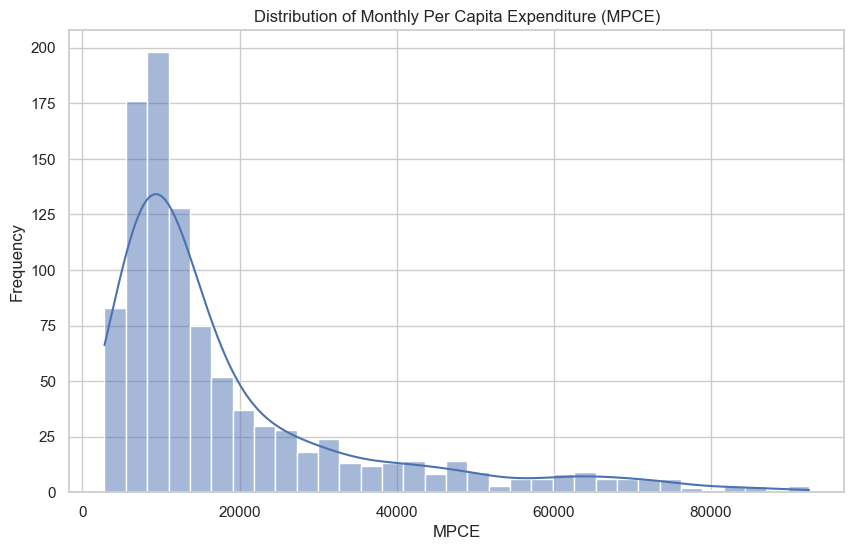

In [9]:
# Create a directory for saving plots
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

# EDA 1: Distribution of MPCE
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['MPCE'], kde=True)
plt.title('Distribution of Monthly Per Capita Expenditure (MPCE)')
plt.xlabel('MPCE')
plt.ylabel('Frequency')
plt.savefig('plots/mpce_distribution.png')
plt.show()

### 4.2 MPCE by State

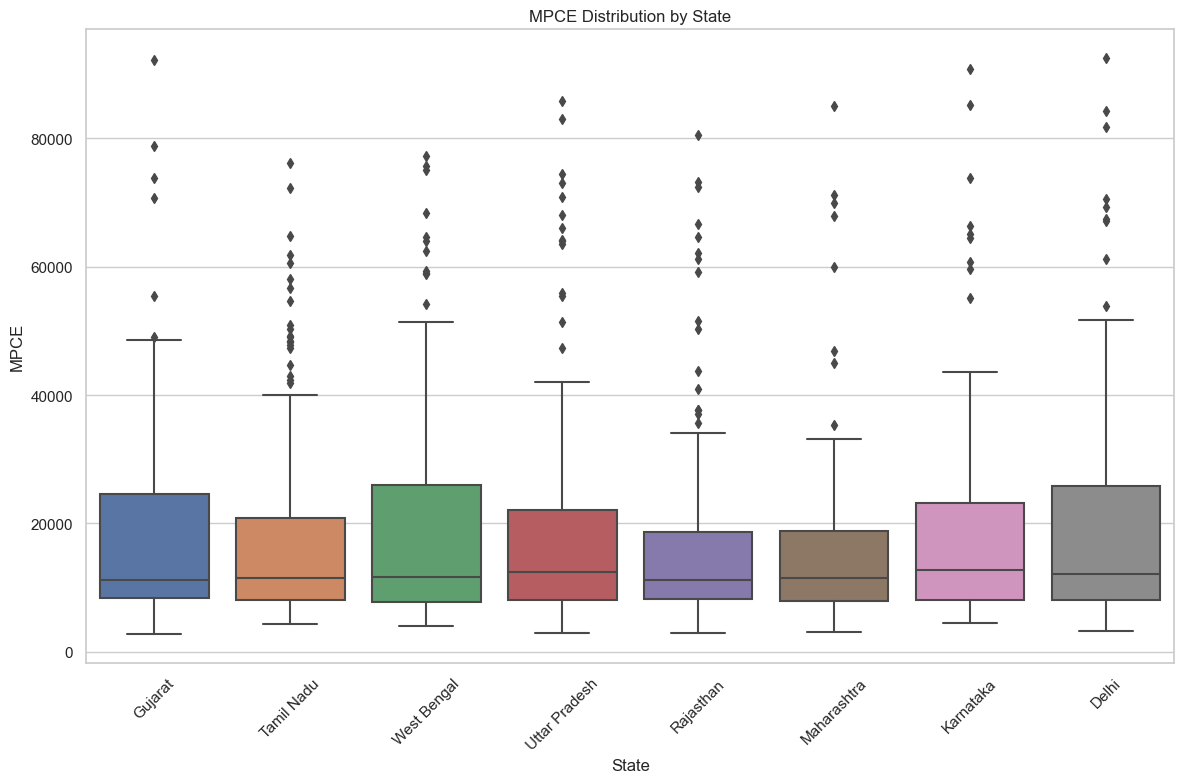

In [10]:
# EDA 2: MPCE by State
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='MPCE', data=df_cleaned)
plt.title('MPCE Distribution by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/mpce_by_state.png')
plt.show()

### 4.3 MPCE by Rural/Urban

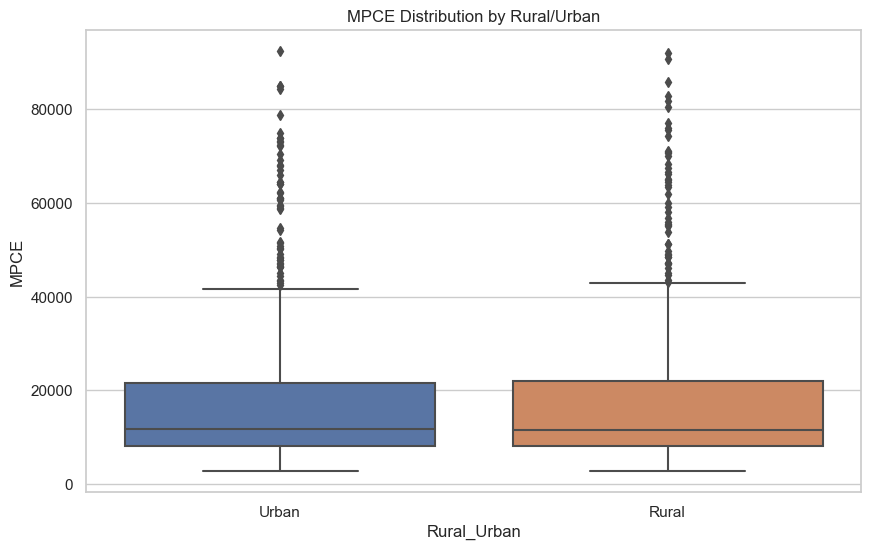

In [11]:
# EDA 3: MPCE by Rural/Urban
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rural_Urban', y='MPCE', data=df_cleaned)
plt.title('MPCE Distribution by Rural/Urban')
plt.savefig('plots/mpce_by_rural_urban.png')
plt.show()

### 4.4 Correlation Matrix

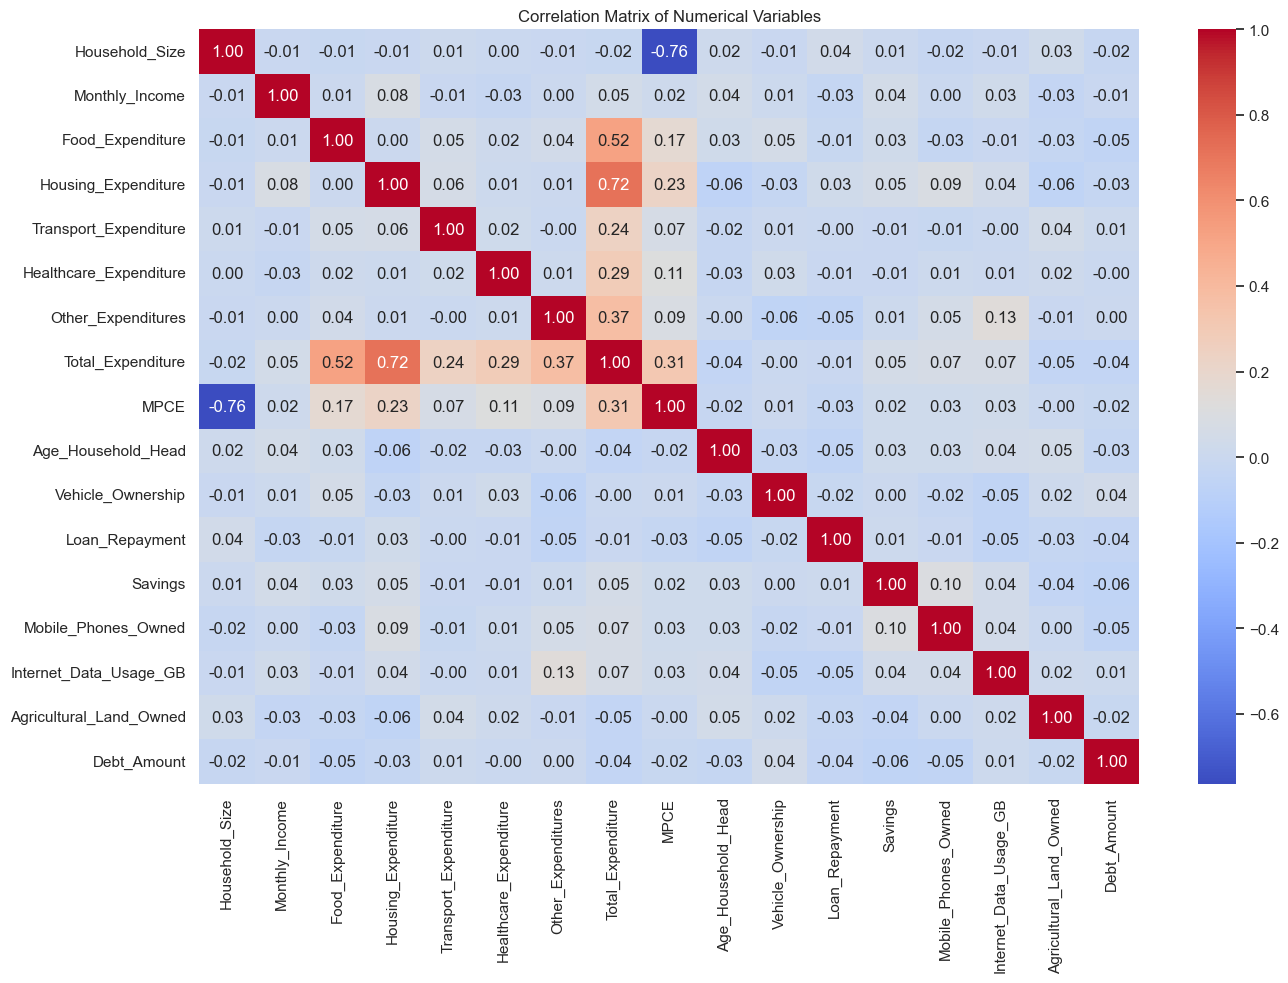

In [12]:
# EDA 4: Correlation between MPCE and other numerical variables
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('plots/correlation_matrix.png')
plt.show()

### 4.5 MPCE by Education Level

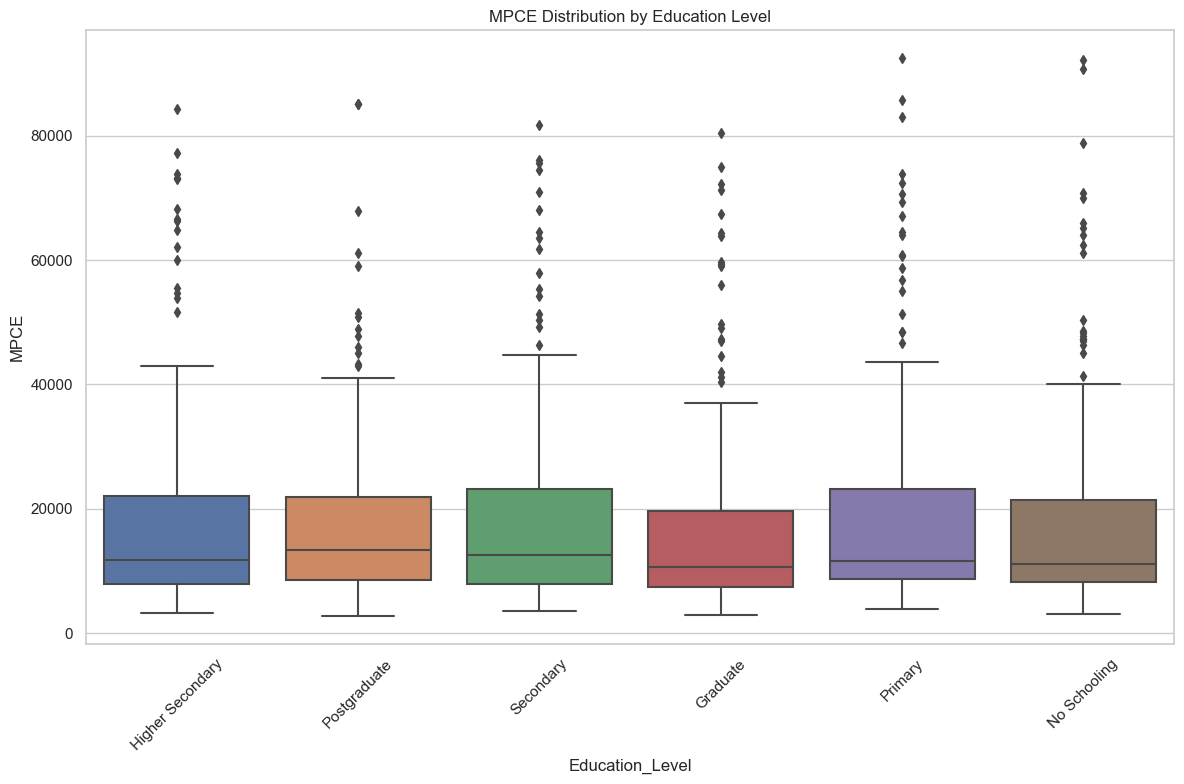

In [13]:
# EDA 5: MPCE by Education Level
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education_Level', y='MPCE', data=df_cleaned)
plt.title('MPCE Distribution by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/mpce_by_education.png')
plt.show()

### 4.6 MPCE by Employment Status

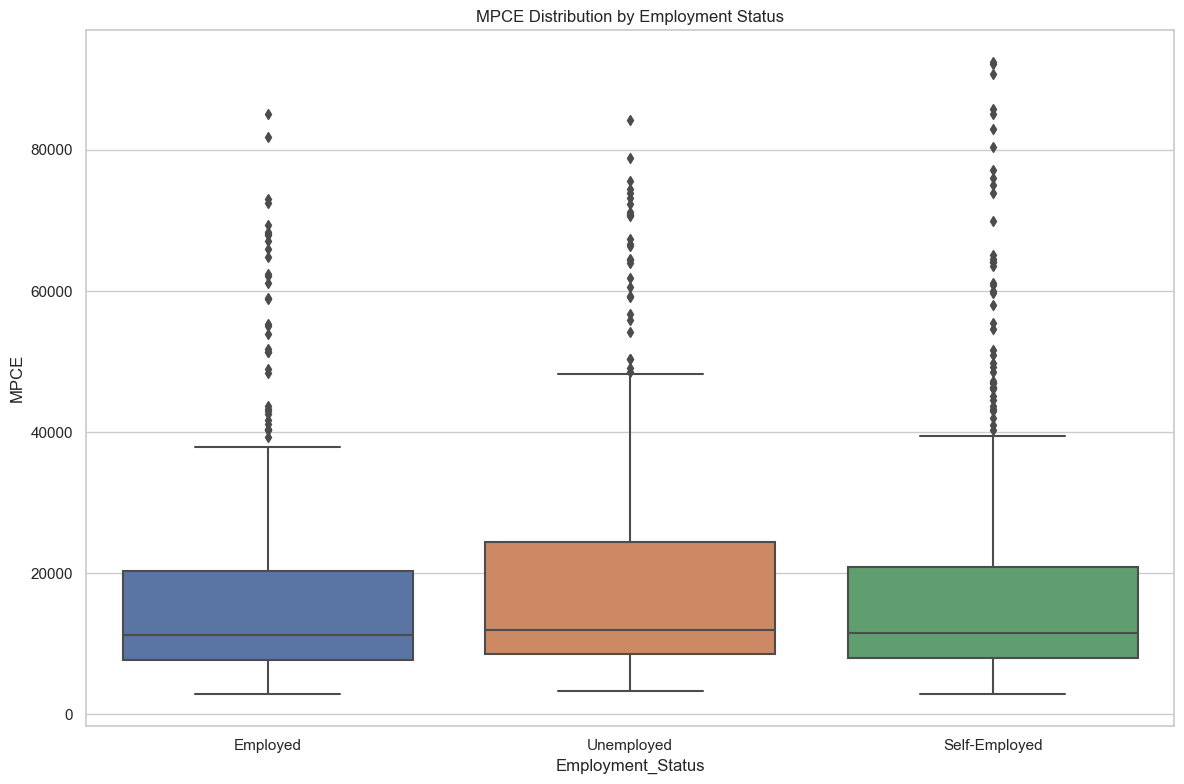

In [14]:
# EDA 6: MPCE by Employment Status
plt.figure(figsize=(12, 8))
sns.boxplot(x='Employment_Status', y='MPCE', data=df_cleaned)
plt.title('MPCE Distribution by Employment Status')
plt.tight_layout()
plt.savefig('plots/mpce_by_employment.png')
plt.show()

### 4.7 MPCE vs Monthly Income

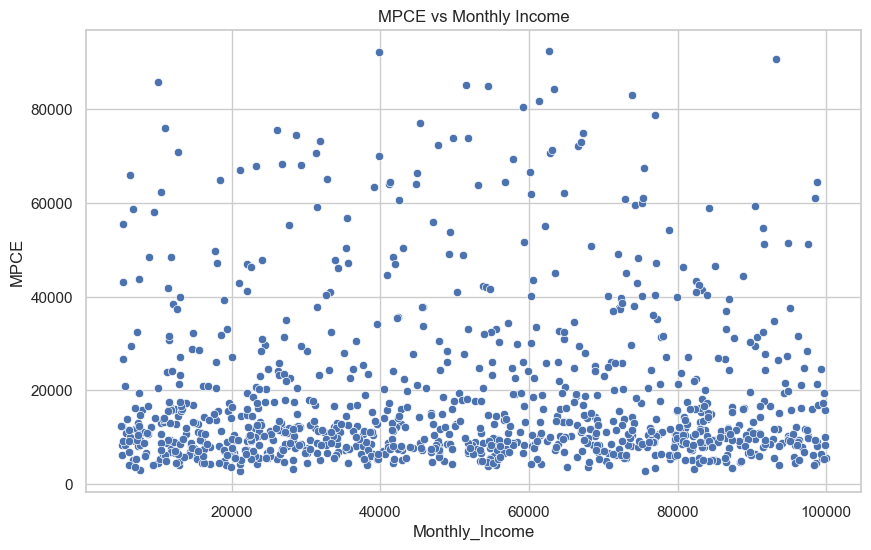

In [15]:
# EDA 7: Scatter plot of MPCE vs Monthly Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly_Income', y='MPCE', data=df_cleaned)
plt.title('MPCE vs Monthly Income')
plt.savefig('plots/mpce_vs_income.png')
plt.show()

## 5. Feature Engineering and Selection

Let's prepare the data for modeling by selecting and transforming relevant features.

In [16]:
# Drop the Household_ID column as it's just an identifier
df_cleaned.drop('Household_ID', axis=1, inplace=True)

# Define features and target variable
X = df_cleaned.drop('MPCE', axis=1)
y = df_cleaned['MPCE']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the columns
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Categorical columns: ['State', 'Rural_Urban', 'Education_Level', 'Employment_Status', 'Gender_Household_Head', 'Electricity_Access', 'Internet_Access', 'Cooking_Fuel_Type', 'Water_Source', 'Sanitation_Facility', 'TV_Ownership', 'Computer_Ownership', 'Type_of_Employment', 'Financial_Aid_Received', 'Type_of_House', 'Insurance_Coverage']
Numerical columns: ['Household_Size', 'Monthly_Income', 'Food_Expenditure', 'Housing_Expenditure', 'Transport_Expenditure', 'Healthcare_Expenditure', 'Other_Expenditures', 'Total_Expenditure', 'Age_Household_Head', 'Vehicle_Ownership', 'Loan_Repayment', 'Savings', 'Mobile_Phones_Owned', 'Internet_Data_Usage_GB', 'Agricultural_Land_Owned', 'Debt_Amount']


## 6. Model Selection and Training

We'll train and evaluate multiple regression models to predict MPCE.

In [17]:
# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dictionary to store model results
model_results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    model_results[name] = {
        'pipeline': pipeline,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")


Training Linear Regression...
Linear Regression - MSE: 100871385.56, RMSE: 10043.47, MAE: 7584.46, R²: 0.6691

Training Random Forest...
Random Forest - MSE: 719777.71, RMSE: 848.40, MAE: 335.73, R²: 0.9976

Training KNN Regressor...
KNN Regressor - MSE: 174030996.38, RMSE: 13192.08, MAE: 7685.94, R²: 0.4292

Training Support Vector Regressor...
Support Vector Regressor - MSE: 369144336.21, RMSE: 19213.13, MAE: 11340.81, R²: -0.2108

Training XGBoost...
XGBoost - MSE: 705499.18, RMSE: 839.94, MAE: 412.06, R²: 0.9977


## 7. Model Comparison and Selection

Let's compare the models and select the best one based on R² score.


Best model based on R² score: XGBoost with R² = 0.9977


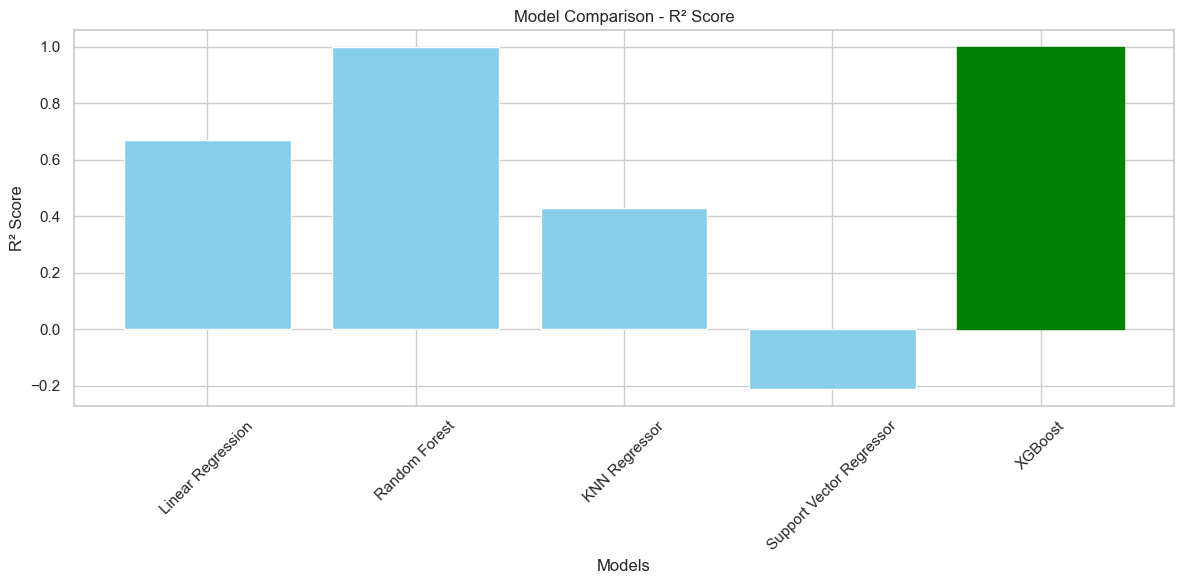

In [18]:
# Compare models based on R² score
r2_scores = {name: results['r2'] for name, results in model_results.items()}
best_model_name = max(r2_scores, key=r2_scores.get)
best_model = model_results[best_model_name]['pipeline']

print(f"\nBest model based on R² score: {best_model_name} with R² = {r2_scores[best_model_name]:.4f}")

# Create a bar chart to compare R² scores
plt.figure(figsize=(12, 6))
models_names = list(r2_scores.keys())
r2_values = list(r2_scores.values())
bars = plt.bar(models_names, r2_values, color='skyblue')
plt.title('Model Comparison - R² Score')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight the best model
best_index = models_names.index(best_model_name)
bars[best_index].set_color('green')

plt.savefig('plots/model_comparison.png')
plt.show()

## 8. Save the Best Model

Let's save the best model for later use in the Streamlit application.

In [19]:
# Save the best model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model ({best_model_name}) saved as 'best_model.pkl'")

print("\nAnalysis and model training completed successfully!")

Best model (XGBoost) saved as 'best_model.pkl'

Analysis and model training completed successfully!


## 9. Feature Importance Analysis

Let's analyze which features are most important for predicting MPCE.

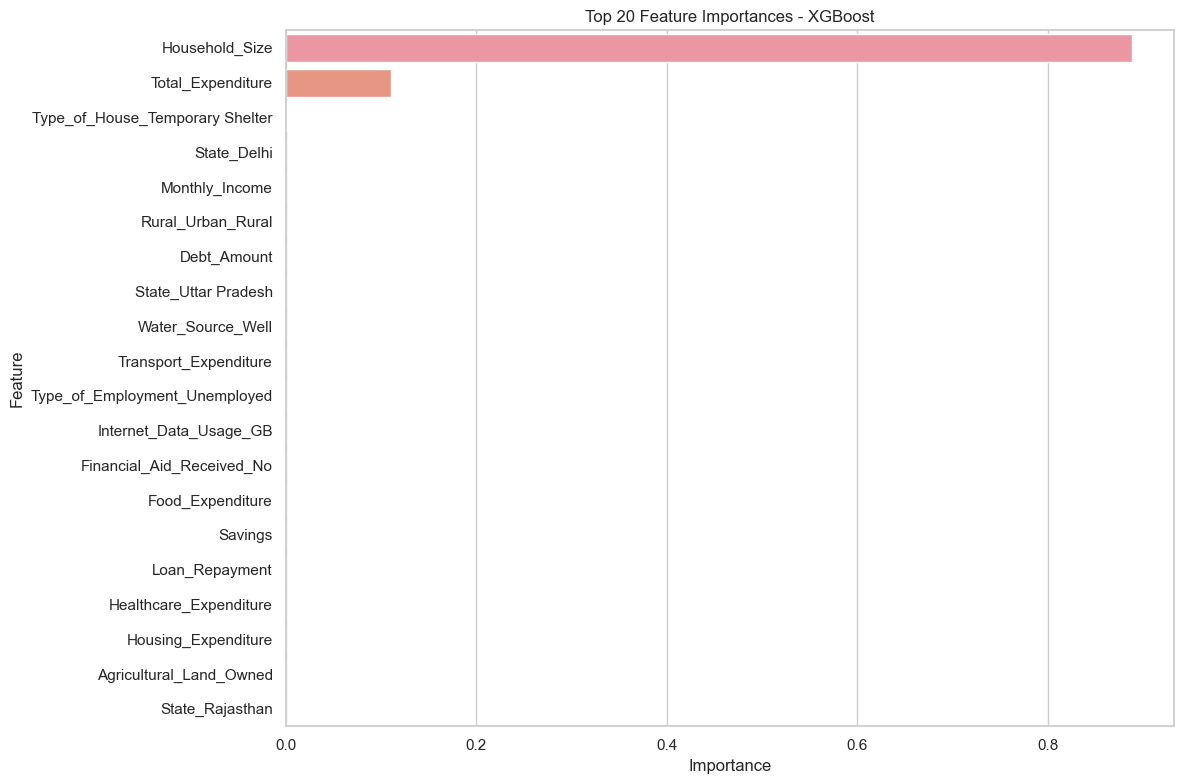

In [20]:
# If the best model is Random Forest or XGBoost, we can extract feature importances
if best_model_name in ['Random Forest', 'XGBoost']:
    # Get the feature names after preprocessing
    # This is a bit complex due to the preprocessing pipeline
    # We'll use a simpler approach by training a model directly on the data
    
    if best_model_name == 'Random Forest':
        direct_model = RandomForestRegressor(random_state=42)
    else:  # XGBoost
        direct_model = XGBRegressor(random_state=42)
    
    # We need to preprocess the data first
    X_train_processed = preprocessor.fit_transform(X_train)
    
    # Train the model
    direct_model.fit(X_train_processed, y_train)
    
    # Get feature importances
    importances = direct_model.feature_importances_
    
    # Get feature names (this is approximate as we don't have exact names after one-hot encoding)
    feature_names = numerical_cols.copy()
    for cat in categorical_cols:
        unique_values = X_train[cat].unique()
        for val in unique_values:
            feature_names.append(f"{cat}_{val}")
    
    # Limit to the number of importances we have
    feature_names = feature_names[:len(importances)]
    
    # Create a dataframe for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False).head(20)
    
    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.savefig('plots/feature_importance.png')
    plt.show()
else:
    print(f"Feature importance analysis not available for {best_model_name}")

## 10. Conclusion

In this notebook, we've analyzed the MPCE dataset, built predictive models, and selected the best model for deployment. The Streamlit application will use this model to provide MPCE predictions and insights for government budget planning and execution.